YEAR:  2007
['Gazole' 'SP95' nan 'GPLc' 'E85']
val MAX Gazole [1999.0, 1964.0, 1900.0]
val MIN Gazole [1.0, 1.0, 1.0]
val MAX SP95 [1999.0, 1800.0, 1690.0]
val MIN SP95 [1.0, 1.0, 1.0]
val MAX GPLc [1312.0, 1280.0, 1199.0]
val MIN GPLc [507.0, 510.0, 510.0]
val MAX E85 [900.0, 899.0, 899.0]
val MIN E85 [750.0, 760.0, 760.0]


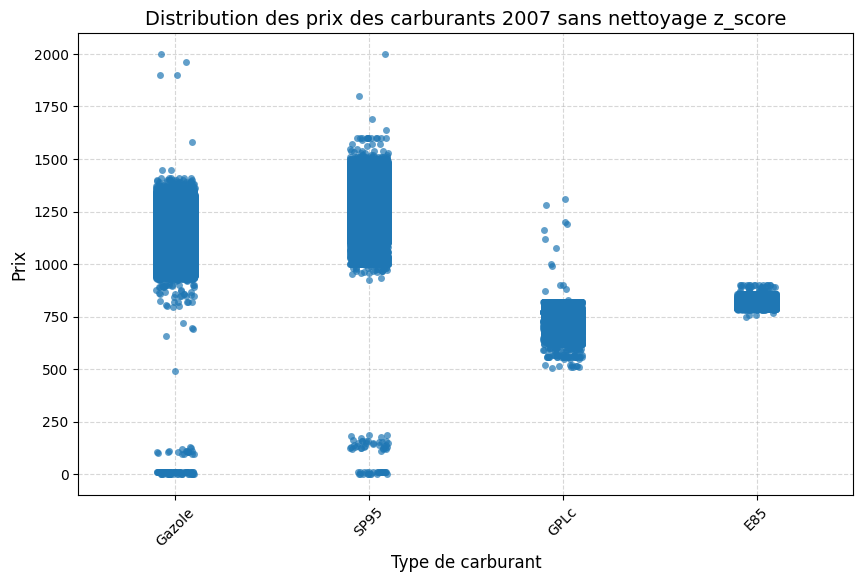

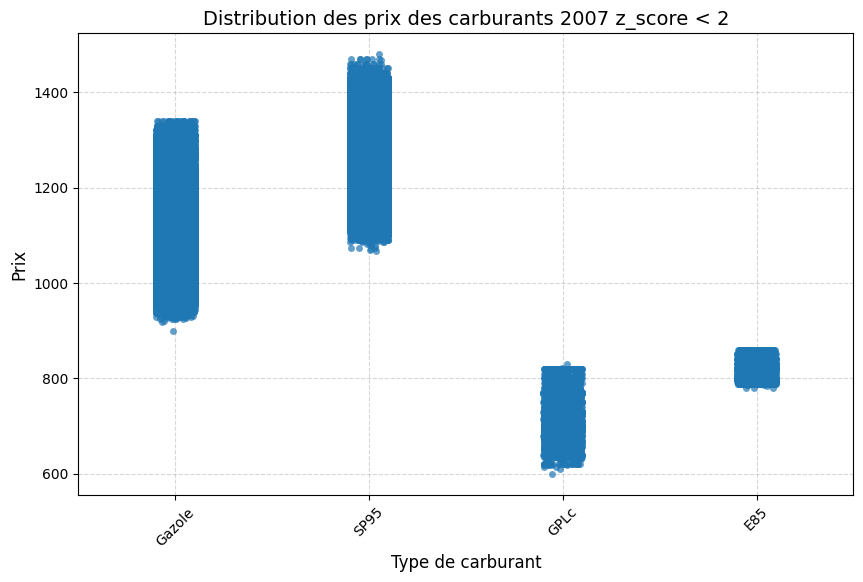

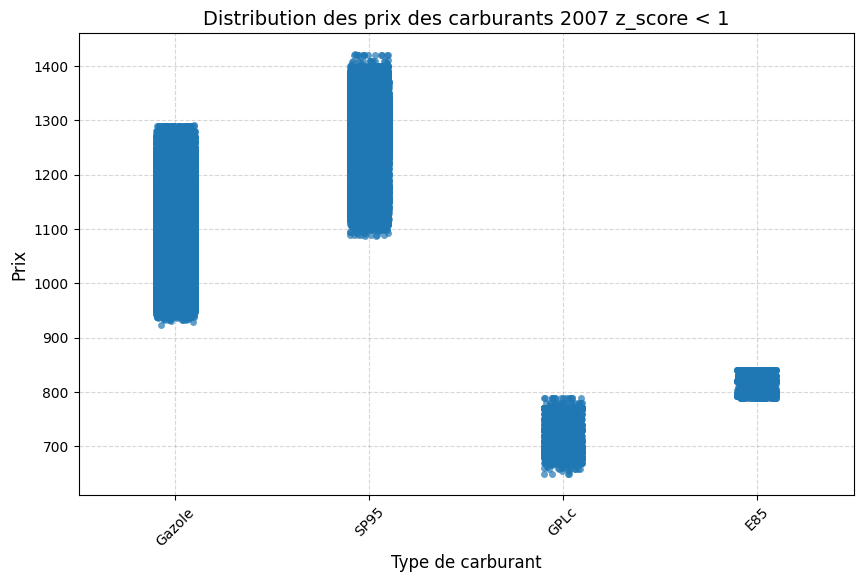

In [1]:
import pandas as pd
import os
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=RuntimeWarning)

# for i in range(1): # one year only
#     year = 2007
for i in range (18): # all years
    year = 2007+i
    print("YEAR: ", year)
    file_path = f"results/inputs_csv/PrixCarburants_annuel_{year}.csv"
    
    if not os.path.exists(file_path):
        print(f"Le fichier {file_path} n'existe pas.")
    else:
        df = pd.read_csv(file_path)
    
        df_prices = df[["maj", "nom", "valeur"]]
        df_prices["maj"] = pd.to_datetime(df_prices["maj"], format="%Y_%m_%d")
        
        # type carburant par dates
        print(df_prices["nom"].unique())
        list_carburant = df_prices["nom"].dropna().unique()
        for carburant in list_carburant:
            df_carburant = df_prices[df_prices["nom"]== carburant].sort_values(by=['valeur'])
            print(f"val MAX {carburant}", df_carburant.nlargest(3, 'valeur')['valeur'].tolist())
            print(f"val MIN {carburant}", df_carburant.nsmallest(3, 'valeur')['valeur'].tolist())

        # clean outlier data by Z-SCORE
        df_prices["z_score"] = df_prices.groupby(["maj", "nom"])["valeur"].transform(lambda x: zscore(x, ddof=0))

        for i in [0,2,1]:
            if i == 0:
                df_prices_filtered = df_prices
            else:
                df_prices_filtered = df_prices[abs(df_prices["z_score"]) < i]
                 
        
            plt.figure(figsize=(10, 6))
            sns.stripplot(data=df_prices_filtered, x="nom", y="valeur", jitter=True, alpha=0.7)
            if i == 0:
                plt.title(f"Distribution des prix des carburants {year} sans nettoyage z_score", fontsize=14)
            else:    
                plt.title(f"Distribution des prix des carburants {year} z_score < {i}", fontsize=14)
            plt.xlabel("Type de carburant", fontsize=12)
            plt.ylabel("Prix", fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, linestyle="--", alpha=0.5)
            
            plt.show()
